In [ ]:
from ultralytics import YOLO
import cv2

# path of the model
model_path = "models/detect_plate.pt"

# load the YOLOv8 model
model = YOLO(model_path)  
model.eval()  # set the evalutation mode

# load the image
image_path = "chapa.jpeg"

image = cv2.imread(image_path)

# tun the model on the image to perform detection
results = model(image)  

# process the detection
plate_count = 0
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  
        conf = box.conf[0].item()  
        cls = int(box.cls[0].item())  

        # crop the image 
        plate_crop = image[y1:y2, x1:x2]

        # save the cropped image
        plate_filename = f"TESTING/plate_{plate_count}.jpg"
        cv2.imwrite(plate_filename, plate_crop)
        plate_count += 1

        # display the cropped image
        cv2.imshow("Cropped Plate", plate_crop)
        cv2.waitKey(500)

# display the original image
cv2.imshow("Original Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 480x640 1 License_Plate, 35.6ms
Speed: 3.6ms preprocess, 35.6ms inference, 116.6ms postprocess per image at shape (1, 3, 480, 640)


## Image of the car:
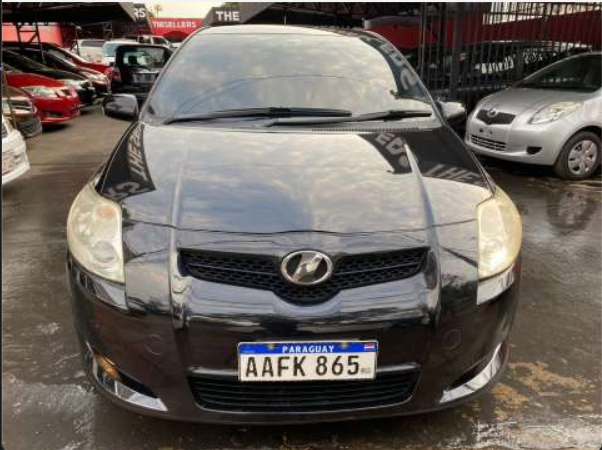

## Cropped plate detected: 
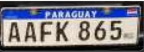